# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing


In [2]:
dataset = fetch_california_housing()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [11]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
#df.columns = dataset.feature_names
#df.head()

In [30]:
# split data in independent x and dependent feature y
x = df
y = dataset.target


In [32]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
# train Test Split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
# train Model 
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [50]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [51]:
model.score(X_train,y_train)

0.9727138182797447

In [54]:
y_pred = model.predict(X_test)

In [56]:
# Step 7: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print("Mean Squared Error:", mse)
print("R2 Score:",r2) 

Mean Squared Error: 0.24893681802276996
R2 Score: 0.8064677424400115


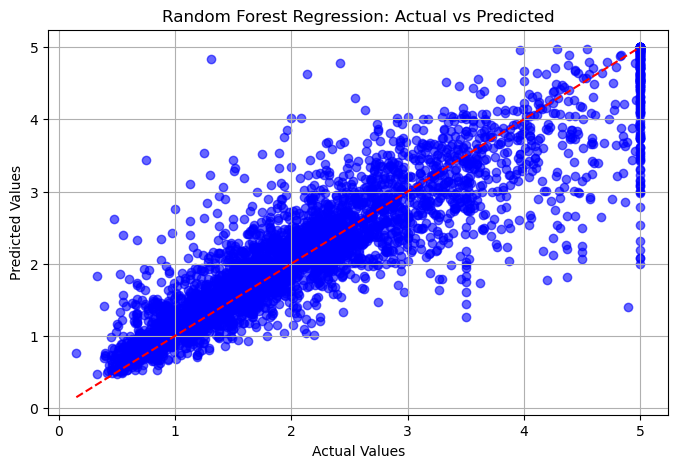

In [64]:
# Step 8: Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# GridSearchCV to perform hyperparameter tuning 

In [75]:
# Step 1: Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [77]:
# Step 2: Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [79]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Step 4: Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [83]:
# Step 5: Initialize model and GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

In [85]:
# Step 6: Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
# Step 7: Best parameters and model evaluation
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [91]:
y_pred = best_model.predict(X_test)


In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.2558668230358652
R2 Score: 0.8047427732223399


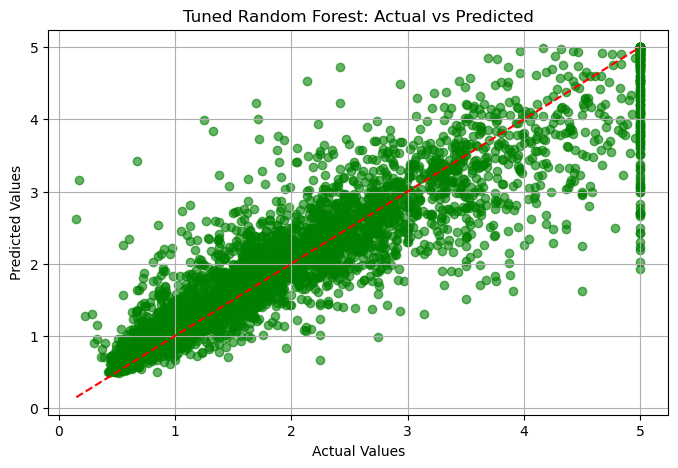

In [95]:
# Step 8: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()